# Plot map regarding sociodemographic clusters

In [1]:
import pandas as pd
import geopandas as gpd
import geobr
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import pathlib
import util
from PIL import Image

## Loading data

In [2]:
df_labeled_clusters = pd.read_csv('data/output/df_labeled_cluster.csv', index_col=0)
df_labeled_clusters['cluster_label'].unique()

array(['Semi-urbanized', 'Urbanized',
       'Rural with high \nhuman development',
       'Urbanized with \ninformal settlements',
       'Rural with low \nhuman development'], dtype=object)

In [3]:
df_labeled_clusters.loc[df_labeled_clusters['cluster_label'] == 'Urbanized with informal settlements', 'cluster_label'] = 'Urbanized with \ninformal settlements'
df_labeled_clusters.loc[df_labeled_clusters['cluster_label'] == 'Rural with high human development', 'cluster_label'] = 'Rural with high \nhuman development'
df_labeled_clusters.loc[df_labeled_clusters['cluster_label'] == 'Rural with low human development', 'cluster_label'] = 'Rural with low \nhuman development'

In [4]:
labels_sorted = ['Urbanized','Urbanized with \ninformal settlements','Semi-urbanized','Rural with high \nhuman development','Rural with low \nhuman development']

In [5]:
try:
    filename_map_municipalities = 'data/map_municipalities_2010.geojson'
    path_map_municipalities = pathlib.Path(filename_map_municipalities)
    map_municipalities = gpd.read_file(path_map_municipalities)

    filename_map_states = 'data/map_states_2010.geojson'
    path_map_states = pathlib.Path(filename_map_states)
    map_states = gpd.read_file(path_map_states)
except:
    map_municipalities = geobr.read_municipality(year=2010)
    map_states =  geobr.read_state(year=2010)
    map_municipalities.to_file('data/map_municipalities_2010.geojson', driver='GeoJSON')
    map_states.to_file('data/map_states_2010.geojson', driver='GeoJSON')

In [6]:
map_municipalities.code_muni = map_municipalities.code_muni.astype('Int64')
df_map_municipalities = map_municipalities.merge(df_labeled_clusters, how="left", left_on="code_muni", right_on="code_municipality_7")

In [7]:
df_map_municipalities.loc[(df_map_municipalities['name_muni'].isin(['Lagoa Mirim', 'Lagoa Dos Patos']) == True)]

,code_muni,name_muni,code_state,abbrev_state,geometry,code_municipality_7,cluster,cluster_label
2669,3137304,Lagoa Dos Patos,31.0,MG,"MULTIPOLYGON (((-44.51250 -16.94176, -44.50472...",3137304.0,0.0,Semi-urbanized
4603,4300001,Lagoa Mirim,43.0,RS,"MULTIPOLYGON (((-52.62242 -32.14398, -52.62241...",NaN,NaN,NaN
4604,4300002,Lagoa Dos Patos,43.0,RS,"MULTIPOLYGON (((-52.08379 -32.18861, -52.08731...",NaN,NaN,NaN


In [8]:
df_map_municipalities = df_map_municipalities.loc[df_map_municipalities.index.isin([4603,4604])==False]

In [9]:
len(df_map_municipalities)

5565

## Ploting map

In [10]:
custom_points = {}

point = map_states[map_states.abbrev_state == 'RJ'].geometry.centroid.values[0]
point = Point(point.x, point.y - 2.2)
custom_points['RJ'] = point

point = map_states[map_states.abbrev_state == 'SC'].geometry.centroid.values[0]
point = Point(point.x + 0.6, point.y - 0.8)
custom_points['SC'] = point

point = map_states[map_states.abbrev_state == 'ES'].geometry.centroid.values[0]
point = Point(point.x + 2.1, point.y - 1)
custom_points['ES'] = point

point = map_states[map_states.abbrev_state == 'SE'].geometry.centroid.values[0]
point = Point(point.x + 1.8, point.y - 1.5)
custom_points['SE'] = point

point = map_states[map_states.abbrev_state == 'AL'].geometry.centroid.values[0]
point = Point(point.x + 1.8, point.y - 1)
custom_points['AL'] = point

point = map_states[map_states.abbrev_state == 'PE'].geometry.centroid.values[0]
point = Point(point.x + 4.1, point.y - 0.7)
custom_points['PE'] = point

point = map_states[map_states.abbrev_state == 'PB'].geometry.centroid.values[0]
point = Point(point.x + 3.1, point.y - 0.5)
custom_points['PB'] = point

point = map_states[map_states.abbrev_state == 'RN'].geometry.centroid.values[0]
point = Point(point.x + 2.8, point.y)
custom_points['RN'] = point

point = map_states[map_states.abbrev_state == 'PI'].geometry.centroid.values[0]
point = Point(point.x + 1, point.y)
custom_points['PI'] = point

point = map_states[map_states.abbrev_state == 'DF'].geometry.centroid.values[0]
point = Point(point.x, point.y + 0.35)
custom_points['DF'] = point

point = map_states[map_states.abbrev_state == 'GO'].geometry.centroid.values[0]
point = Point(point.x, point.y - 1.4)
custom_points['GO'] = point

point = map_states[map_states.abbrev_state == 'AC'].geometry.centroid.values[0]
point = Point(point.x, point.y - 0.4)
custom_points['AC'] = point

<ipython-input-10-14fc443e71bc>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = map_states[map_states.abbrev_state == 'RJ'].geometry.centroid.values[0]
<ipython-input-10-14fc443e71bc>:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = map_states[map_states.abbrev_state == 'SC'].geometry.centroid.values[0]
<ipython-input-10-14fc443e71bc>:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = map_states[map_states.abbrev_state == 'ES'].geometry.centroid.values[0]
<ipython-input-10-14fc443e71bc>:15: UserWarning: Geometry is in a geographic CRS. Results fro

In [11]:
def replace_legend_items(legend, sorted_labels):
    for txt in legend.texts:
        for i in range(len(sorted_labels)):
            if txt.get_text() == str(i):
                txt.set_text(sorted_labels[i])

def plot_map_clusters(df, column, analysis='general'):        
    for i in range(len(labels_sorted)):
        label = labels_sorted[i]
        df.loc[df[column] == label, 'order_cluster'] = str(i)

    linewidth_estados = 0.4
    # linewidth_municipios = linewidth_estados * 0.000001
    linewidth_municipios = 0

    sns.set(font_scale=1.1)
    sns.set_style("ticks")
    fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(17.4), util.centimeter_to_inch(17.4)))

    missing_kwds = dict(color='grey', label='No data')

    df.plot(
        column='order_cluster',
        legend=True,
        cmap=util.get_default_colors_maps(5),
        legend_kwds={'loc': 'lower left', 'ncol': 1, 'bbox_to_anchor': (-0.075, 0)},
        edgecolor="gray",
        linewidth=linewidth_municipios,
        categorical=True,
        missing_kwds=missing_kwds,
        ax=ax
    )

    map_states.boundary.plot(edgecolor="black", linewidth=linewidth_estados, ax=ax)

    map_states[map_states.abbrev_state.isin(['RJ', 'SC', 'ES', 'SE', 'AL', 'PE', 'PB', 'RN', 'DF', 'GO', 'PI', 'AC']) == False].apply(lambda x: ax.annotate(text=x.abbrev_state, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

    for ponto in custom_points.keys():
        ax.text(custom_points[ponto].x, custom_points[ponto].y, ponto, ha='center')

    ax.axis("off")
    
    fig.tight_layout()
    
    replace_legend_items(ax.get_legend(), labels_sorted)    
    fig.savefig('images/map_risk_factors_'+analysis+'.png', bbox_inches="tight")
    fig.savefig('images/map_risk_factors_'+analysis+'.pdf', bbox_inches="tight")
    fig.savefig('images/map_risk_factors_'+analysis+'.tiff', format='tiff', dpi=300, transparent=False, bbox_inches='tight')
    img = Image.open('images/map_risk_factors_'+analysis+'.tiff')
    img.save('images/map_risk_factors_'+analysis+'_compressed.tiff', compression="tiff_lzw")    
    plt.show()

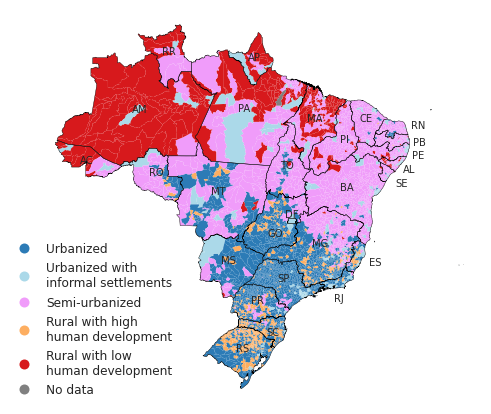

In [12]:
plot_map_clusters(df_map_municipalities, 'cluster_label')

In [13]:
df_map_municipalities

,code_muni,name_muni,code_state,abbrev_state,geometry,code_municipality_7,cluster,cluster_label,order_cluster
0,1100015,Alta Floresta D'oeste,11.0,RO,"MULTIPOLYGON (((-62.24620 -11.90149, -62.24151...",1100015.0,0.0,Semi-urbanized,2
1,1100023,Ariquemes,11.0,RO,"MULTIPOLYGON (((-63.13712 -9.78413, -63.09013 ...",1100023.0,1.0,Urbanized,0
2,1100031,Cabixi,11.0,RO,"MULTIPOLYGON (((-60.52408 -13.32137, -60.37161...",1100031.0,2.0,Rural with high \nhuman development,3
3,1100049,Cacoal,11.0,RO,"MULTIPOLYGON (((-61.42679 -11.11376, -61.42900...",1100049.0,1.0,Urbanized,0
4,1100056,Cerejeiras,11.0,RO,"MULTIPOLYGON (((-61.41347 -13.23417, -61.42603...",1100056.0,1.0,Urbanized,0
...,...,...,...,...,...,...,...,...,...
5562,5222005,Vianópolis,52.0,GO,"POLYGON ((-48.54164 -16.74126, -48.53274 -16.7...",5222005.0,1.0,Urbanized,0
5563,5222054,Vicentinópolis,52.0,GO,"POLYGON ((-49.90713 -17.61460, -49.90588 -17.6...",5222054.0,1.0,Urbanized,0
5564,5222203,Vila Boa,52.0,GO,"POLYGON ((-46.97635 -14.93112, -46.94801 -15.0...",5222203.0,0.0,Semi-urbanized,2
5565,5222302,Vila Propício,52.0,GO,"POLYGON ((-48.86700 -15.09735, -48.86191 -15.0...",5222302.0,0.0,Semi-urbanized,2


In [14]:
df_base = pd.read_csv('data/output/df_dataset.csv', index_col=0)

In [15]:
df_base

,code_municipality_7,municipality,region,population,latitude,longitude,code_municipality_6,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
0,1100015,Alta Floresta D'Oeste (RO),Norte,21495,-11.935540,-61.999824,110001,29.276576,29.309142,26.871365,...,34.73,6.07,58.32,1.15,38.56,13.78,33.18,3.26,8.41,8.67
1,1100023,Ariquemes (RO),Norte,96833,-9.908463,-63.033269,110002,29.736763,33.135398,25.601809,...,27.66,5.11,47.19,0.16,14.97,17.99,40.06,9.10,5.92,9.18
2,1100031,Cabixi (RO),Norte,5363,-13.499763,-60.544314,110003,27.428678,24.855491,28.305053,...,32.98,2.90,60.62,0.65,45.49,6.46,36.91,3.98,10.18,10.09
3,1100049,Cacoal (RO),Norte,86895,-11.433865,-61.442944,110004,27.389378,33.099718,26.171817,...,24.97,6.28,44.93,0.43,19.69,19.00,39.07,10.43,6.29,9.74
4,1100056,Cerejeiras (RO),Norte,15890,-13.195033,-60.818426,110005,28.445563,30.780365,26.085588,...,28.46,5.72,54.46,0.38,26.67,14.08,38.39,6.87,7.85,10.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis (GO),Centro-Oeste,14956,-16.742081,-48.513471,522200,27.360257,29.459749,28.450120,...,26.44,4.03,50.59,1.23,24.67,13.05,38.80,13.71,6.55,10.11
5566,5222054,Vicentinópolis (GO),Centro-Oeste,8768,-17.732662,-49.807239,522205,28.592609,32.744069,26.881843,...,17.41,6.23,41.65,1.55,32.41,10.67,34.51,16.29,9.13,10.07
5567,5222203,Vila Boa (GO),Centro-Oeste,4215,-15.034889,-47.057361,522220,33.618031,29.822064,24.578885,...,13.70,8.93,38.76,1.74,26.76,7.35,31.03,14.85,12.83,10.49
5568,5222302,Vila Propício (GO),Centro-Oeste,5815,-15.454635,-48.882422,522230,28.323302,26.672399,29.062769,...,23.59,4.46,62.74,0.20,47.74,5.17,28.96,6.97,14.32,9.46


In [16]:
df_base = df_base.merge(df_labeled_clusters, how='right', on='code_municipality_7')

In [17]:
df_base

,code_municipality_7,municipality,region,population,latitude,longitude,code_municipality_6,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,...,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18,cluster,cluster_label
0,1100015,Alta Floresta D'Oeste (RO),Norte,21495,-11.935540,-61.999824,110001,29.276576,29.309142,26.871365,...,58.32,1.15,38.56,13.78,33.18,3.26,8.41,8.67,0,Semi-urbanized
1,1100023,Ariquemes (RO),Norte,96833,-9.908463,-63.033269,110002,29.736763,33.135398,25.601809,...,47.19,0.16,14.97,17.99,40.06,9.10,5.92,9.18,1,Urbanized
2,1100031,Cabixi (RO),Norte,5363,-13.499763,-60.544314,110003,27.428678,24.855491,28.305053,...,60.62,0.65,45.49,6.46,36.91,3.98,10.18,10.09,2,Rural with high \nhuman development
3,1100049,Cacoal (RO),Norte,86895,-11.433865,-61.442944,110004,27.389378,33.099718,26.171817,...,44.93,0.43,19.69,19.00,39.07,10.43,6.29,9.74,1,Urbanized
4,1100056,Cerejeiras (RO),Norte,15890,-13.195033,-60.818426,110005,28.445563,30.780365,26.085588,...,54.46,0.38,26.67,14.08,38.39,6.87,7.85,10.22,1,Urbanized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,5222005,Vianópolis (GO),Centro-Oeste,14956,-16.742081,-48.513471,522200,27.360257,29.459749,28.450120,...,50.59,1.23,24.67,13.05,38.80,13.71,6.55,10.11,1,Urbanized
5556,5222054,Vicentinópolis (GO),Centro-Oeste,8768,-17.732662,-49.807239,522205,28.592609,32.744069,26.881843,...,41.65,1.55,32.41,10.67,34.51,16.29,9.13,10.07,1,Urbanized
5557,5222203,Vila Boa (GO),Centro-Oeste,4215,-15.034889,-47.057361,522220,33.618031,29.822064,24.578885,...,38.76,1.74,26.76,7.35,31.03,14.85,12.83,10.49,0,Semi-urbanized
5558,5222302,Vila Propício (GO),Centro-Oeste,5815,-15.454635,-48.882422,522230,28.323302,26.672399,29.062769,...,62.74,0.20,47.74,5.17,28.96,6.97,14.32,9.46,0,Semi-urbanized


In [18]:
len(df_base[(df_base.municipality.str.contains('(PA)'))])

<ipython-input-18-d41a2602e9e0>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  len(df_base[(df_base.municipality.str.contains('(PA)'))])


142

In [19]:
df_base[(df_base.municipality.str.contains('(MG)')) & (df_base.cluster_label == 'Urbanized with informal settlements')]

<ipython-input-19-0f46c4ba75af>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_base[(df_base.municipality.str.contains('(MG)')) & (df_base.cluster_label == 'Urbanized with informal settlements')]


,code_municipality_7,municipality,region,population,latitude,longitude,code_municipality_6,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,...,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18,cluster,cluster_label


In [21]:
df_base

,code_municipality_7,municipality,region,population,latitude,longitude,code_municipality_6,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,...,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18,cluster,cluster_label
0,1100015,Alta Floresta D'Oeste (RO),Norte,21495,-11.935540,-61.999824,110001,29.276576,29.309142,26.871365,...,58.32,1.15,38.56,13.78,33.18,3.26,8.41,8.67,0,Semi-urbanized
1,1100023,Ariquemes (RO),Norte,96833,-9.908463,-63.033269,110002,29.736763,33.135398,25.601809,...,47.19,0.16,14.97,17.99,40.06,9.10,5.92,9.18,1,Urbanized
2,1100031,Cabixi (RO),Norte,5363,-13.499763,-60.544314,110003,27.428678,24.855491,28.305053,...,60.62,0.65,45.49,6.46,36.91,3.98,10.18,10.09,2,Rural with high \nhuman development
3,1100049,Cacoal (RO),Norte,86895,-11.433865,-61.442944,110004,27.389378,33.099718,26.171817,...,44.93,0.43,19.69,19.00,39.07,10.43,6.29,9.74,1,Urbanized
4,1100056,Cerejeiras (RO),Norte,15890,-13.195033,-60.818426,110005,28.445563,30.780365,26.085588,...,54.46,0.38,26.67,14.08,38.39,6.87,7.85,10.22,1,Urbanized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,5222005,Vianópolis (GO),Centro-Oeste,14956,-16.742081,-48.513471,522200,27.360257,29.459749,28.450120,...,50.59,1.23,24.67,13.05,38.80,13.71,6.55,10.11,1,Urbanized
5556,5222054,Vicentinópolis (GO),Centro-Oeste,8768,-17.732662,-49.807239,522205,28.592609,32.744069,26.881843,...,41.65,1.55,32.41,10.67,34.51,16.29,9.13,10.07,1,Urbanized
5557,5222203,Vila Boa (GO),Centro-Oeste,4215,-15.034889,-47.057361,522220,33.618031,29.822064,24.578885,...,38.76,1.74,26.76,7.35,31.03,14.85,12.83,10.49,0,Semi-urbanized
5558,5222302,Vila Propício (GO),Centro-Oeste,5815,-15.454635,-48.882422,522230,28.323302,26.672399,29.062769,...,62.74,0.20,47.74,5.17,28.96,6.97,14.32,9.46,0,Semi-urbanized


In [26]:
len(df_base[(df_base['cluster_label'] == 'Urbanized') & (df_base['percentage_estimated_households_in_informal_settlements']>0)])/len(df_base[(df_base['cluster_label'] == 'Urbanized')])*100

14.358974358974358

In [28]:
df_base[(df_base['cluster_label'] == 'Urbanized') & (df_base['percentage_estimated_households_in_informal_settlements']>0)]['percentage_estimated_households_in_informal_settlements'].describe()

count    280.000000
mean       3.916592
std        5.500279
min        0.039807
25%        0.770811
50%        1.846521
75%        4.772114
max       39.476515
Name: percentage_estimated_households_in_informal_settlements, dtype: float64

In [29]:
df_base[(df_base['cluster_label'] == 'Urbanized with informal settlements') & (df_base['percentage_estimated_households_in_informal_settlements']>0)]['percentage_estimated_households_in_informal_settlements'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: percentage_estimated_households_in_informal_settlements, dtype: float64

In [30]:
df_base[(df_base['cluster_label'] == 'Urbanized')][['per_capita_cash_transfer_program','percentage_estimated_households_in_informal_settlements']].describe()

,per_capita_cash_transfer_program,percentage_estimated_households_in_informal_settlements
count,1950.000000,1950.000000
mean,57.372508,0.562382
std,36.430115,2.493602
min,2.530000,0.000000
25%,30.712500,0.000000
50%,49.875000,0.000000
75%,75.682500,0.000000
max,343.190000,39.476515


In [31]:
df_base[(df_base['cluster_label'] == 'Urbanized with informal settlements')][['per_capita_cash_transfer_program','percentage_estimated_households_in_informal_settlements']].describe()

,per_capita_cash_transfer_program,percentage_estimated_households_in_informal_settlements
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [32]:
df_base[df_base['cluster_label']=='Urbanized with informal settlements'][['municipality','population','percentage_urban_population','percentage_estimated_households_in_informal_settlements']]

,municipality,population,percentage_urban_population,percentage_estimated_households_in_informal_settlements


In [33]:
df_map_municipalities

,code_muni,name_muni,code_state,abbrev_state,geometry,code_municipality_7,cluster,cluster_label,order_cluster
0,1100015,Alta Floresta D'oeste,11.0,RO,"MULTIPOLYGON (((-62.24620 -11.90149, -62.24151...",1100015.0,0.0,Semi-urbanized,2
1,1100023,Ariquemes,11.0,RO,"MULTIPOLYGON (((-63.13712 -9.78413, -63.09013 ...",1100023.0,1.0,Urbanized,0
2,1100031,Cabixi,11.0,RO,"MULTIPOLYGON (((-60.52408 -13.32137, -60.37161...",1100031.0,2.0,Rural with high \nhuman development,3
3,1100049,Cacoal,11.0,RO,"MULTIPOLYGON (((-61.42679 -11.11376, -61.42900...",1100049.0,1.0,Urbanized,0
4,1100056,Cerejeiras,11.0,RO,"MULTIPOLYGON (((-61.41347 -13.23417, -61.42603...",1100056.0,1.0,Urbanized,0
...,...,...,...,...,...,...,...,...,...
5562,5222005,Vianópolis,52.0,GO,"POLYGON ((-48.54164 -16.74126, -48.53274 -16.7...",5222005.0,1.0,Urbanized,0
5563,5222054,Vicentinópolis,52.0,GO,"POLYGON ((-49.90713 -17.61460, -49.90588 -17.6...",5222054.0,1.0,Urbanized,0
5564,5222203,Vila Boa,52.0,GO,"POLYGON ((-46.97635 -14.93112, -46.94801 -15.0...",5222203.0,0.0,Semi-urbanized,2
5565,5222302,Vila Propício,52.0,GO,"POLYGON ((-48.86700 -15.09735, -48.86191 -15.0...",5222302.0,0.0,Semi-urbanized,2
